#### List of Frames
- stock_df (base frame)
- crypto_df (base frame)
- companies_df (base frame)



In [2]:
# Import Modules

import pandas as pd
from datetime import timedelta


In [3]:
# Load Stock & Crypto Dataframes

stock_csv = "stocks.csv"
stock_df = pd.read_csv(stock_csv)

crypto_csv = "cryptocurrency.csv"
crypto_df = pd.read_csv(crypto_csv)

companies_csv = "companies.csv"
companies_df = pd.read_csv(companies_csv)

In [4]:
# Cleaning Stock Data

stock_df = stock_df.replace({'\%': ''}, regex=True)
stock_df = stock_df.replace({'\+': ''}, regex=True)
stock_df = stock_df.rename(columns = {'last': 'price_usd'})

def convert_volume(value):
    """Convert volume strings with K, M, B suffixes to numbers"""
    if pd.isna(value):
        return value
    
    value = str(value).strip()
    
    if value.endswith('K'):
        return float(value[:-1]) * 1_000
    elif value.endswith('M'):
        return float(value[:-1]) * 1_000_000
    elif value.endswith('B'):
        return float(value[:-1]) * 1_000_000_000
    else:
        return float(value)

stock_df['vol_'] = stock_df['vol_'].apply(convert_volume)
stock_df = stock_df.drop('ticker', axis=1, errors='ignore')

lookup = companies_df[['ticker', 'company name', 'short name']].copy()

lookup['company_lower'] = lookup['company name'].str.lower().str.strip()
lookup['short_lower'] = lookup['short name'].str.lower().str.strip()

stock_df['name_lower'] = stock_df['name'].str.lower().str.strip()

stock_df = stock_df.merge(lookup[['ticker', 'company_lower']], 
                          left_on='name_lower', 
                          right_on='company_lower', 
                          how='left', 
                          suffixes=('', '_drop'))

mask = stock_df['ticker'].isna()
temp_merge = stock_df[mask].drop('ticker', axis=1).merge(
    lookup[['ticker', 'short_lower']], 
    left_on='name_lower', 
    right_on='short_lower', 
    how='left'
)
stock_df.loc[mask, 'ticker'] = temp_merge['ticker'].values

stock_df = stock_df.drop(['name_lower', 'company_lower', 'short_lower'], axis=1, errors='ignore')

cols = stock_df.columns.tolist()
name_idx = cols.index('name')
ticker_idx = cols.index('ticker')
cols.insert(name_idx + 1, cols.pop(ticker_idx))
stock_df = stock_df[cols]

stock_df = stock_df.rename(columns = {'ticker': 'symbol'})

<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:4: SyntaxWarning: invalid escape sequence '\+'
<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:4: SyntaxWarning: invalid escape sequence '\+'
/var/folders/l1/69zb5btj6478v2j97c11q7vh0000gn/T/ipykernel_41758/1235864510.py:3: SyntaxWarning: invalid escape sequence '\%'
  stock_df = stock_df.replace({'\%': ''}, regex=True)
/var/folders/l1/69zb5btj6478v2j97c11q7vh0000gn/T/ipykernel_41758/1235864510.py:4: SyntaxWarning: invalid escape sequence '\+'
  stock_df = stock_df.replace({'\+': ''}, regex=True)


In [5]:
# Cleaning Crypto Data

crypto_df = crypto_df.replace({'\$': ''}, regex=True)
crypto_df = crypto_df.replace({'\%': ''}, regex=True)
crypto_df = crypto_df.replace({'\+': ''}, regex=True)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\+'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\+'
/var/folders/l1/69zb5btj6478v2j97c11q7vh0000gn/T/ipykernel_41758/1717063382.py:3: SyntaxWarning: invalid escape sequence '\$'
  crypto_df = crypto_df.replace({'\$': ''}, regex=True)
/var/folders/l1/69zb5btj6478v2j97c11q7vh0000gn/T/ipykernel_41758/1717063382.py:4: SyntaxWarning: invalid escape sequence '\%'
  crypto_df = crypto_df.replace({'\%': ''}, regex=True)
/var/folders/l1/69zb5btj6478v2j97c11q7vh0000gn/T/ipykernel_41758/1717063382.py:5: SyntaxWarning: invalid escape sequence '\+'
  crypto_df = crypto_df.replace({'\+': ''}, regex=True)


In [6]:
# Cleaning Company Data

companies_df = companies_df.drop('logo', axis=1)
companies_df = companies_df.drop('market cap', axis=1)
companies_df = companies_df.drop('ceo', axis=1)
companies_df = companies_df.drop('website', axis=1)
companies_df = companies_df.drop('description', axis=1)

In [7]:
# Stock Base Frame 
stock_df.head(3)

,timestamp,name,symbol,price_usd,high,low,chg_,chg_%,vol_,time
0,2025-10-14 18:00:03,NVIDIA,NVDA,181.19,184.80,179.70,-7.13,-3.79,74860000.0,10:57:55
1,2025-10-14 18:00:03,Amazon.com,AMZN,216.19,216.92,212.60,-3.88,-1.76,16800000.0,10:58:30
2,2025-10-14 18:00:03,3M,NaN,151.84,152.19,149.28,0.74,0.49,479840.0,10:58:34


In [8]:
# Crypto Base Frame
crypto_df.head(3)

,timestamp,name,symbol,price_usd,vol_24h,total_vol,chg_24h,chg_7d,market_cap
0,2025-10-14 18:42:04,Wrapped stETH,wsteth,"4,862.78","17,303,242.00",0.00,-3.08,-13.06,"15,541,897,587"
1,2025-10-14 18:42:04,Figure Heloc,figr_heloc,1.00,"5,942,967.00",0.00,2.52,0.17,"12,973,755,429"
2,2025-10-14 18:42:04,Wrapped eETH,weeth,"4,312.52","13,561,342.00",0.00,-3.06,-13.12,"10,582,898,874"


In [9]:
# Companies Base Frame
companies_df.head(3)

,ticker,company name,short name,industry,exchange,sector,tag 1,tag 2,tag 3
0,A,Agilent Technologies Inc.,Agilent,Medical Diagnostics & Research,New York Stock Exchange,Healthcare,Healthcare,Diagnostics & Research,Medical Diagnostics & Research
1,AA,Alcoa Corporation,Alcoa,Metals & Mining,New York Stock Exchange,Basic Materials,Basic Materials,Aluminum,Metals & Mining
2,AABA,Altaba Inc.,Altaba,Asset Management,Nasdaq Global Select,Financial Services,Financial Services,Asset Management,NaN


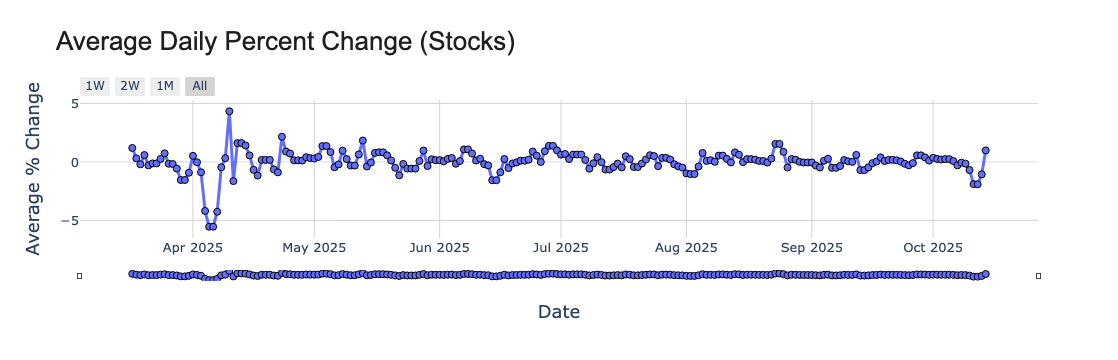

In [43]:
import pandas as pd
import plotly.express as px

df = stock_df.copy()

df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

cand_cols = [c for c in df.columns if c.lower() in
             ("chg_%", "chg_pct", "pct_change", "percent_change")]
if not cand_cols:
    cand_cols = [c for c in df.columns if "chg" in c.lower() and "%" in c.lower()]
if not cand_cols:
    raise ValueError("Couldn't find a percent-change column (e.g., 'chg_%').")

pct_col = cand_cols[0]

df[pct_col] = (
    df[pct_col].astype(str)
               .str.replace("%", "", regex=False)
               .str.replace(",", "", regex=False)
               .str.replace(r"[^\d\.\-]", "", regex=True)
)
df[pct_col] = pd.to_numeric(df[pct_col], errors="coerce")

df["date"] = df["timestamp"].dt.date

daily_avg = (df.groupby("date", as_index=False)[pct_col]
               .mean()
               .sort_values("date"))

# Plot
fig = px.line(
    daily_avg,
    x="date",
    y=pct_col,
    markers=True,
    title="Average Daily Percent Change (Stocks)",
    labels={pct_col: "Average % Change", "date": "Date"}
)

# --- STYLE IMPROVEMENTS ---
fig.update_traces(
    line=dict(width=3),
    marker=dict(size=7, line=dict(width=1, color="black")),
    hovertemplate="<b>Date:</b> %{x}<br><b>Avg Change:</b> %{y:.2f}%<extra></extra>"
)

fig.update_layout(
    template="plotly_white",
    title=dict(font=dict(size=26, family="Arial", color="#1f1f1f")),
    plot_bgcolor="rgba(0,0,0,0)",
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
        font_family="Arial"
    ),
    xaxis=dict(
        title="Date",
        showgrid=True,
        gridcolor="lightgray",
        tickfont=dict(size=13),
        titlefont=dict(size=18),
        rangeselector=dict(
            buttons=list([
                dict(count=7, label="1W", step="day", stepmode="backward"),
                dict(count=14, label="2W", step="day", stepmode="backward"),
                dict(count=1, label="1M", step="month", stepmode="backward"),
                dict(step="all", label="All")
            ])
        ),
        rangeslider=dict(
            visible=True,
            thickness=0.06
        ),
        type="date"
    ),
    yaxis=dict(
        title="Average % Change",
        showgrid=True,
        gridcolor="lightgray",
        tickfont=dict(size=13),
        titlefont=dict(size=18)
    )
)
fig.show()

Takeaway:

This visualization illustrates how the stock market behaves on a day-to-day basis by tracking the average percent change of stock prices over time. When viewed across multiple months, the chart reveals that most daily changes remain clustered close to zero, meaning that the market tends to move gradually rather than through extreme daily swings. The few noticeable spikes and dips correspond to periods of unusual volatility—likely earnings releases, macroeconomic news, or shifts in investor sentiment—which briefly disrupt the otherwise stable trend. The interactive time filters (1W, 2W, 1M, All) allow users to zoom into shorter windows and uncover short-term patterns, such as momentum surges, brief pullbacks, or stabilization phases. Together, these insights help contextualize how dynamic the market is, making it easier for viewers to understand whether recent price movements are typical fluctuations or indicators of emerging trends.

Design Idea:

The design prioritizes clarity, readability, and user exploration. A simple blue line paired with circular markers highlights each daily data point while keeping the visual clean and easy to interpret. The range slider beneath the chart gives users the freedom to examine both high-level overview patterns and detailed micro-movements, making the visualization more interactive without overwhelming the viewer. Large typography, a balanced use of white space, and the removal of unnecessary visual clutter all contribute to a professional and unobtrusive design. Soft gridlines and muted axis colors support the data rather than distract from it, ensuring the viewer’s focus stays on the daily performance trend. Overall, the design aims to present complex time-series data in a smooth, intuitive format that invites users to investigate the market’s rhythm over time.

In [63]:
import numpy as np
import pandas as pd
import plotly.express as px

stock = stock_df.copy()
stock["timestamp"] = pd.to_datetime(stock["timestamp"], errors="coerce")
for col in ["price_usd","chg_%","vol_"]:
    stock[col] = (stock[col].astype(str)
                  .str.replace(",", "", regex=False)
                  .str.replace(r"[^\d\.\-]", "", regex=True))
    stock[col] = pd.to_numeric(stock[col], errors="coerce")
stock["type"] = "Stock"

crypto = crypto_df.copy()
crypto["timestamp"] = pd.to_datetime(crypto["timestamp"], errors="coerce")
for col in ["price_usd","chg_24h","vol_24h"]:
    crypto[col] = (crypto[col].astype(str)
                   .str.replace(",", "", regex=False)
                   .str.replace(r"[^\d\.\-]", "", regex=True))
    crypto[col] = pd.to_numeric(crypto[col], errors="coerce")
crypto = crypto.rename(columns={"chg_24h":"chg_%","vol_24h":"vol_"})
crypto["type"] = "Crypto"

# Basic cleaning
df = pd.concat([
    stock[["type","name","symbol","timestamp","price_usd","chg_%","vol_"]],
    crypto[["type","name","symbol","timestamp","price_usd","chg_%","vol_"]],
], ignore_index=True)

df["symbol"] = df["symbol"].fillna(df["name"]).astype(str)
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["price_usd","chg_%","vol_"])
df = df[df["vol_"] > 0]

# Limit to a recent window
end = df["timestamp"].max()
start = end - pd.Timedelta(days=30)
df = df[(df["timestamp"] >= start) & (df["timestamp"] <= end)]

agg = (df.groupby(["type","symbol","name"], as_index=False)
         .agg(price_usd=("price_usd","median"),   
              chg_pct=("chg_%","mean"),           
              volume=("vol_","sum")))             

# Get rid of extreme outliers
lo, hi = agg["chg_pct"].quantile([0.02, 0.98])
agg = agg[(agg["chg_pct"] >= lo) & (agg["chg_pct"] <= hi)]

# Keep top N
N = 40
agg = (agg.sort_values("volume", ascending=False)
          .groupby("type", group_keys=False).head(N))

sizeref = 2.0 * agg["volume"].max() / (55.0**2)  

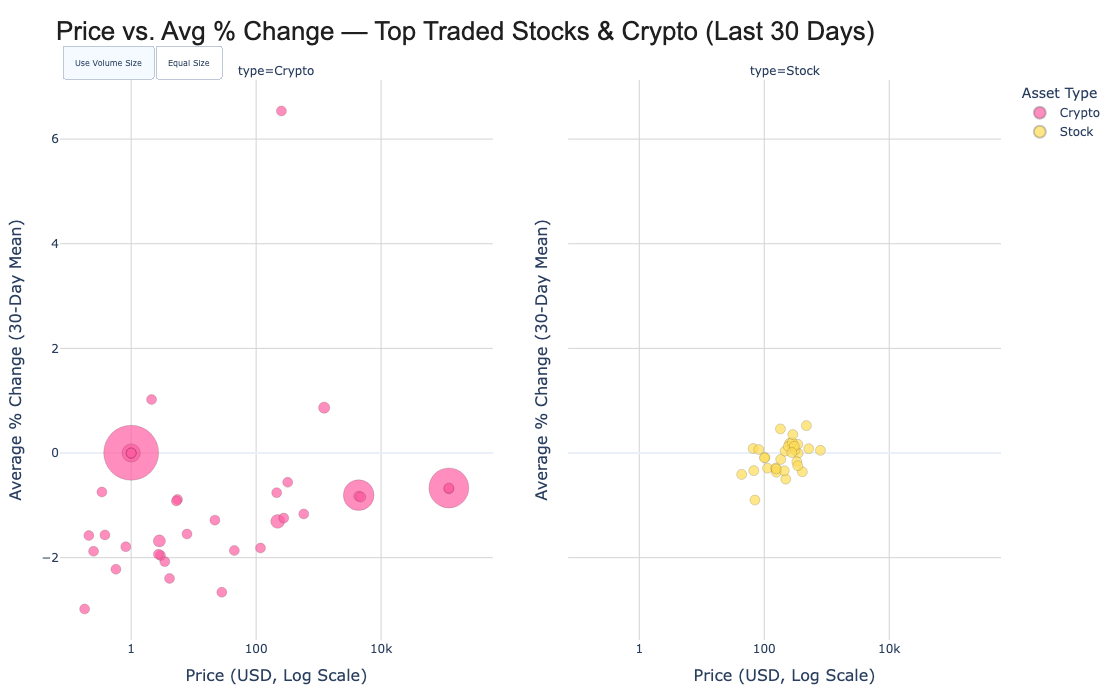

In [69]:
# Enhanced Interactive Bubble Plot
fig = px.scatter(
    agg,
    x="price_usd",
    y="chg_pct",
    size="volume",
    color="type",
    color_discrete_map={
        "Crypto": "#FF5DA2",   
        "Stock":  "#FFDD57"    
    },
    hover_name="name",
    hover_data={
        "symbol": True,
        "price_usd": ":,.2f",
        "chg_pct": ":.2f",
        "volume": ":,.0f",
        "type": False
    },
    facet_col="type",
    facet_col_spacing=0.08,
    title="Price vs. Avg % Change — Top Traded Stocks & Crypto (Last 30 Days)"
)

# --- Improved marker style ---
fig.update_traces(
    marker=dict(
        sizemode="area",
        sizeref=sizeref,
        sizemin=5,
        opacity=0.7,
        line=dict(width=0.7, color="rgba(0,0,0,0.3)")
    ),
    selector=dict(mode="markers")
)

# --- Layout styling ---
fig.update_layout(
    template="plotly_white",
    height=700,
    margin=dict(l=60, r=40, t=80, b=60),
    legend_title_text="Asset Type",
    title=dict(font=dict(size=26, family="Arial", color="#1f1f1f"))
)

# --- Axis styling ---
fig.update_xaxes(
    title="Price (USD, Log Scale)",
    type="log",
    tickfont=dict(size=12),
    titlefont=dict(size=16),
    gridcolor="lightgray"
)

fig.update_yaxes(
    title="Average % Change (30-Day Mean)",
    tickfont=dict(size=12),
    titlefont=dict(size=16),
    gridcolor="lightgray"
)

# INTERACTIVE ELEMENT 2: Marker Size Toggle (Volume vs Equal Size)
fig.update_layout(
    updatemenus=list(fig.layout.updatemenus) + [
        dict(
            type="buttons",
            direction="right",
            x=0,
            y=1,
            xanchor="left",
            yanchor="bottom",
            pad=dict(l=2, r=2, t=2, b=2),  # smaller padding
            font=dict(size=8),           # smaller text
            showactive=True,
            buttons=[
                dict(
                    label="Use Volume Size",
                    method="restyle",
                    args=[{"marker.size": [agg["volume"].values.tolist()] * len(fig.data)}]
                ),
                dict(
                    label="Equal Size",
                    method="restyle",
                    args=[{"marker.size": [[12] * len(agg)] * len(fig.data)}]
                ),
            ]
        )
    ]
)
# INTERACTIVE ELEMENT 3: Hovertemplate Upgrade
fig.update_traces(
    hovertemplate="<b>%{hovertext}</b><br>" +
                  "Symbol: %{customdata[0]}<br>" +
                  "Price: $%{customdata[1]:,.2f}<br>" +
                  "Avg Change: %{customdata[2]:.2f}%<br>" +
                  "Volume: %{customdata[3]:,.0f}<extra></extra>"
)

fig.show()

Takeaway:

This bubble plot highlights the relationship between price, average percent change, and trading volume across the most actively traded stocks and cryptocurrencies over the past 30 days. The visualization makes the differences between the two asset classes immediately apparent: cryptocurrencies exhibit much wider variation in both price and volatility, forming a dispersed cloud of points across the chart. Stocks, on the other hand, cluster tightly around lower levels of average percent change, demonstrating far more stability in their monthly performance. Larger bubbles—representing higher trading volume—help viewers pinpoint which assets are driving market activity, showing that some extremely volatile crypto assets also receive substantial trading attention. By combining three dimensions of data into a single chart, this visualization uncovers patterns that would be harder to detect when viewing these variables separately, making it clear how volatility and market behavior differ dramatically between stocks and crypto.

Design Idea:

The design of this visualization focuses on clarity, comparability, and visual storytelling. A faceted layout splits the chart into two side-by-side panels—one for crypto and one for stocks—so viewers can make immediate comparisons without visual overlap or confusion. Using a log scale for price allows assets ranging from a few dollars to tens of thousands to coexist in the same frame without compressing the lower range. Color-coding bubbles in bright pink (crypto) and yellow (stocks) provides instant category recognition and creates a visually appealing contrast. The bubble size toggle (Volume vs Equal Size) adds an interactive dimension, allowing users to shift the narrative between “Which assets move the market the most?” and “How do these assets compare independent of trading volume?” The clean, modern aesthetic, combined with subtle gridlines and thoughtfully placed axis labels, ensures that the viewer is never overwhelmed despite the multi-variable nature of the plot.

In [71]:
import altair as alt

alt.renderers.enable("default")

# Color scheme
color_scale = alt.Scale(
    domain=["Crypto", "Stock"],
    range=["#FF5DA2", "#FFDD57"]
)

selector = alt.selection_multi(fields=["type"], bind="legend")

rank_bar = (
    alt.Chart(agg, title="Top 30-Day Movers — Stocks & Crypto")
    .mark_bar()
    .encode(
        y=alt.Y("name:N",
                sort=alt.SortField("chg_pct", order="descending"),
                title="Asset"),
        x=alt.X("chg_pct:Q", title="Average % Change (30-Day)"),
        color=alt.Color("type:N", scale=color_scale),
        opacity=alt.condition(selector, alt.value(1), alt.value(0.2)),
        tooltip=[
            alt.Tooltip("name:N", title="Name"),
            alt.Tooltip("symbol:N", title="Symbol"),
            alt.Tooltip("chg_pct:Q", title="Avg % Change", format=".2f"),
            alt.Tooltip("price_usd:Q", title="Median Price", format=",.2f"),
            alt.Tooltip("volume:Q", title="Volume", format=",.0f")
        ]
    )
    .add_params(selector)
    .properties(width=500, height=700)
)

rank_bar

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning:

'selection_multi' is deprecated.  Use 'selection_point'

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)

Takeaway:

This horizontal bar chart ranks the top gainers and losers across stocks and cryptocurrencies over the past 30 days, offering a clear snapshot of which assets experienced the most dramatic momentum shifts. A key insight from the visualization is that cryptocurrencies dominate both the highest positive returns and the steepest losses, highlighting their inherently volatile nature compared to the more stable, consistently performing stocks. While a handful of stocks appear among the positive movers, their returns are modest relative to crypto’s magnitude, and the few stock entries that appear on the negative side also show far smaller declines. This ranking format allows users to immediately identify standout performers, emerging trends, and assets exhibiting unusual or extreme behavior. Overall, the chart demonstrates the sharp contrast in risk profile between the two markets, with crypto showing explosive movements and stocks offering more predictable, incremental changes.

Design Idea:

The bar chart is intentionally structured to emphasize readability and ranking clarity. A horizontal layout allows long asset names—especially cryptocurrencies with multi-word labels—to be displayed without truncation. Sorting the bars from highest to lowest percent change creates a natural narrative flow, guiding the viewer from top performers to the largest underperformers in one smooth scan. The dual-color scheme, using pink for crypto and yellow for stocks, reinforces category differences and visually exposes how one group dominates the extremes of the distribution. Minimalist gridlines, precise spacing, and consistent bar thickness ensure that the focus stays on comparing performance magnitudes rather than navigating visual noise. The design’s goal is to deliver a high-impact, insights-first visualization that helps users quickly understand where market movement is concentrated and which assets deserve closer attention.